<a href="https://colab.research.google.com/github/suzzingV/Time-Series-Analysis/blob/main/timeseries_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 한글 패치
install.packages("showtext")
library(showtext)
font_add_google("Noto Serif", "noto")
showtext_auto()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



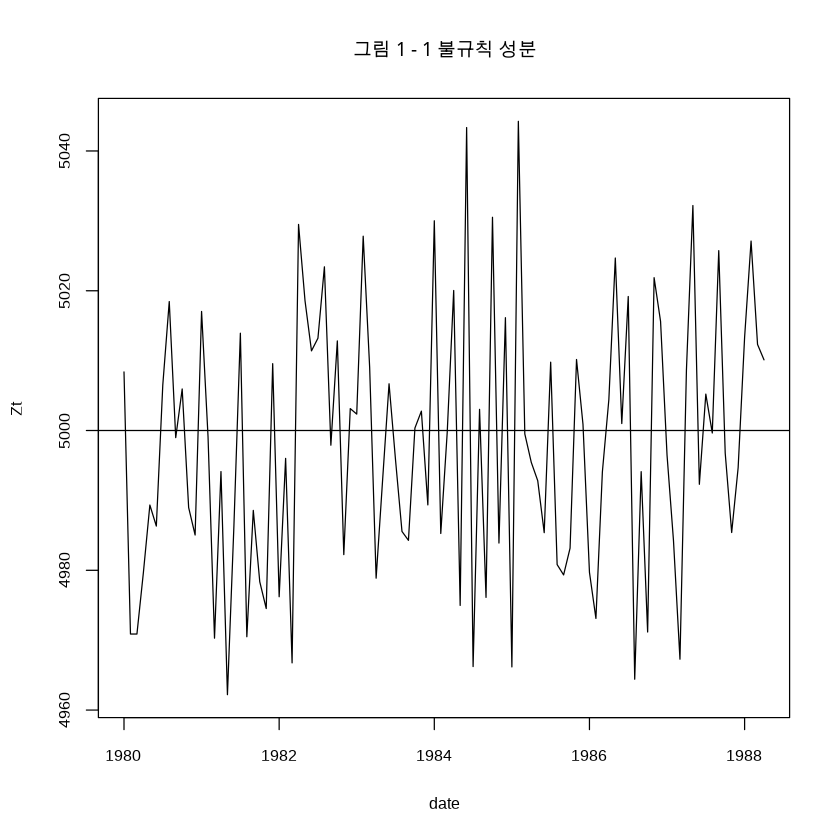

In [6]:
## Figure 1.1 : 불규칙 성분
set.seed(1245) # 난수 생성기의 초기값 설정 -> 코드 실행마다 동일한 난수 생성되어 결과의 재현성
n = 100 # 난수 개수
z <- 5000 + 20 * rnorm(n) # 정규 난수 생성(평균 5000, 표준편차 20인 정규 분포에서 난수 생성)
z.ts <- ts(z, start = c(1980, 1), frequency = 12) # 시계열 자료로 변환 # 시계열의 시작 지점을 1980 1월로 설정 # 시계열의 빈도 12 -> 월간 데이터
ts.plot(z.ts, xlab = "date", ylab = "Zt", main = "그림 1 - 1 불규칙 성분"); abline(h = 5000)

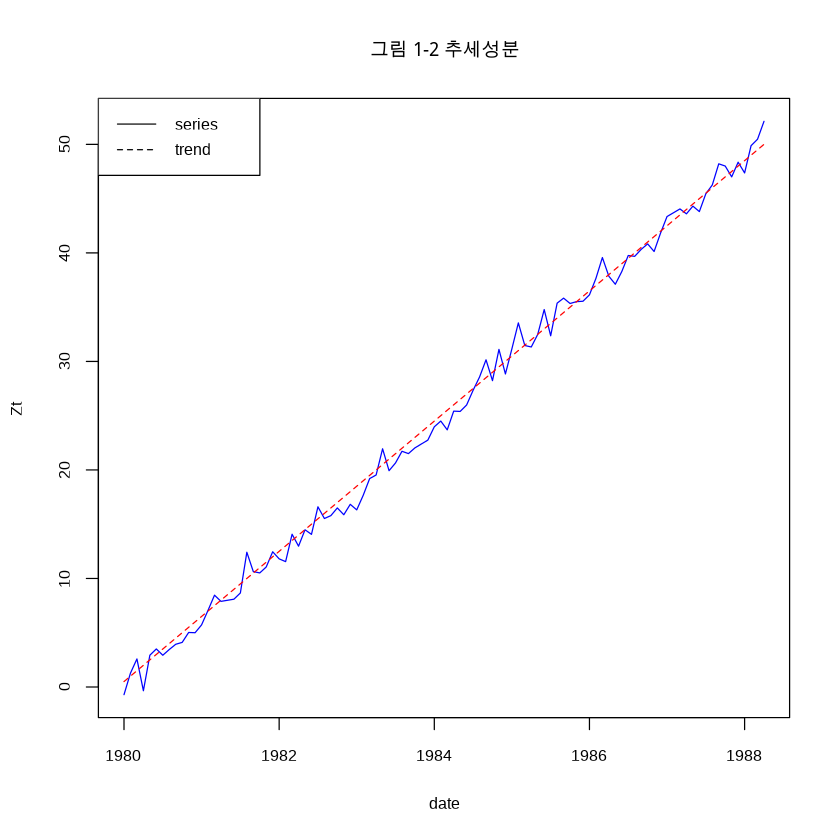

In [7]:
## Figure 1.2 : 추세성분
set.seed(1234)
n = 100; t <- 1:n
x <- 0.5 * t
z <- 0.5 * t + rnorm(n)
z.ts <- ts(z, start = c(1980, 1), frequency = 12)
x.ts <- ts(x, start = c(1980, 1), frequency = 12)
ts.plot(z.ts, x.ts, col = c("blue", "red"), lty = 1:2, xlab = "date", ylab = "Zt", main = "그림 1-2 추세성분")
legend("topleft", legend = c("series", "trend"), lty = 1:2)

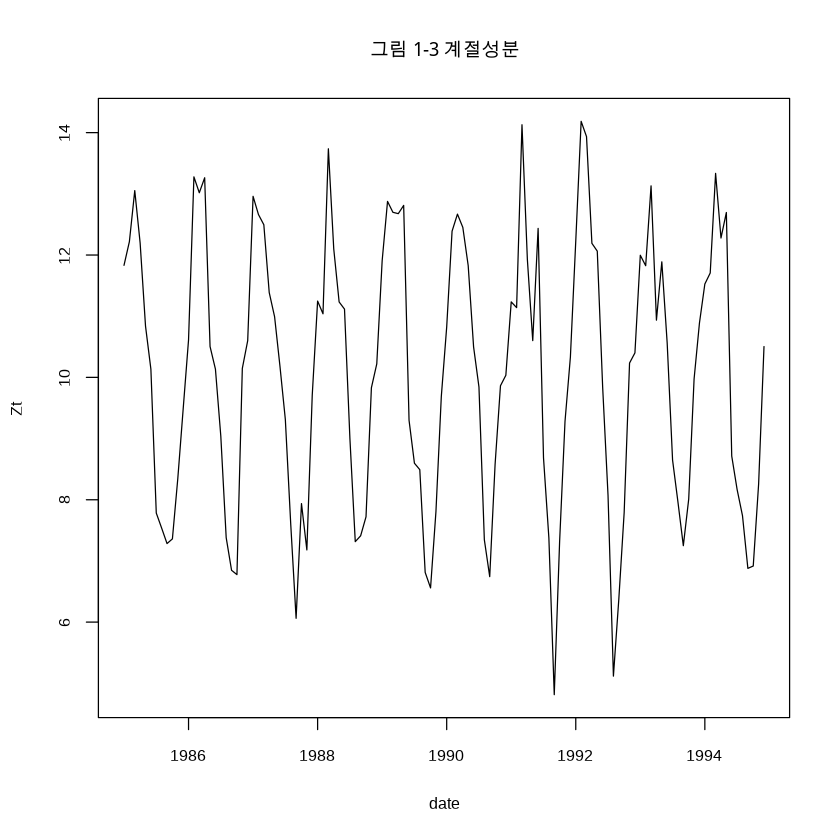

In [8]:
## Figure 1.3 : 계절성분
n = 120; t <- 1:n
a <- rnorm(n, 0, 1) # 평균 0, 표준편차 1인 정규분포로부터 n개의 난수 생성
z <- 10 + 3 * sin((2 * pi * t)/12) + 0.8 * a
z.ts <- ts(z, start = c(1985, 1), frequency=12)
plot(z.ts, xlab = "date", ylab = "Zt", main = "그림 1-3 계절성분")

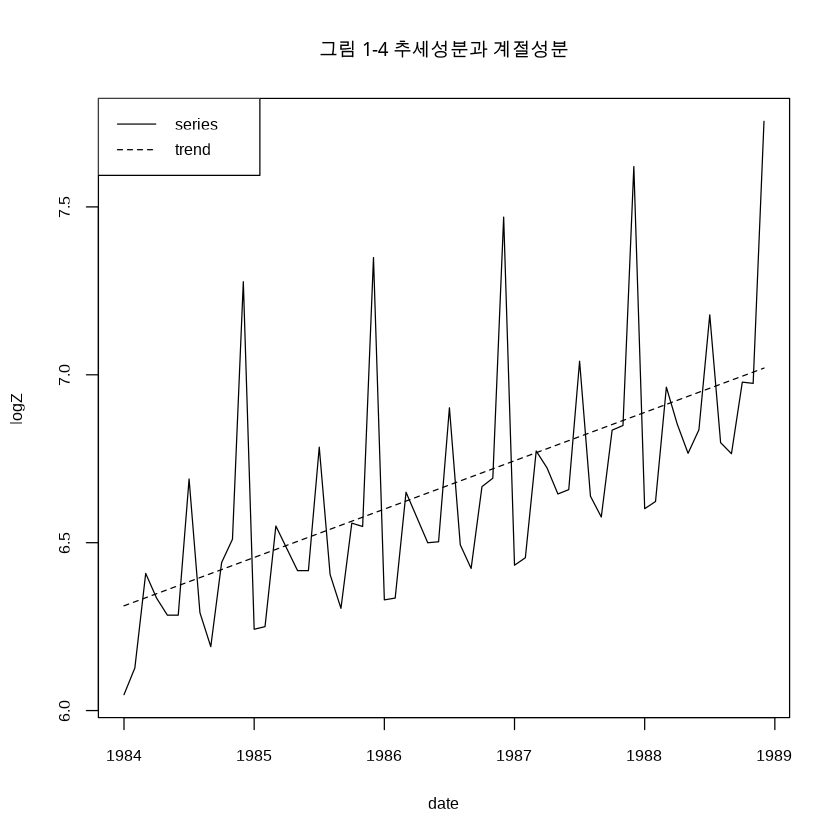

In [10]:
## Figure 1.4 : 추세성분과 계절성분
z <- scan("/content/depart.txt")
lz <- log(z) # log transform : 변동성 안정화, 데이터 비대칭도 감소, 추세나 계절성 분석을 위한 덧셈적 모델로 변환
t <- 1:length(z)
x <- 6.3 + 0.012* t
fig <- data.frame(lz, x) # 여러 개의 그림 동시에 그리기 위해 data frame 생성
z.ts <- ts(fig, start = c(1984, 1), frequency = 12)
ts.plot(z.ts, lty = 1:2, xlab = "date", ylab = "logZ", main = "그림 1-4 추세성분과 계절성분")
legend("topleft", legend = c("series", "trend"), lty = 1:2)

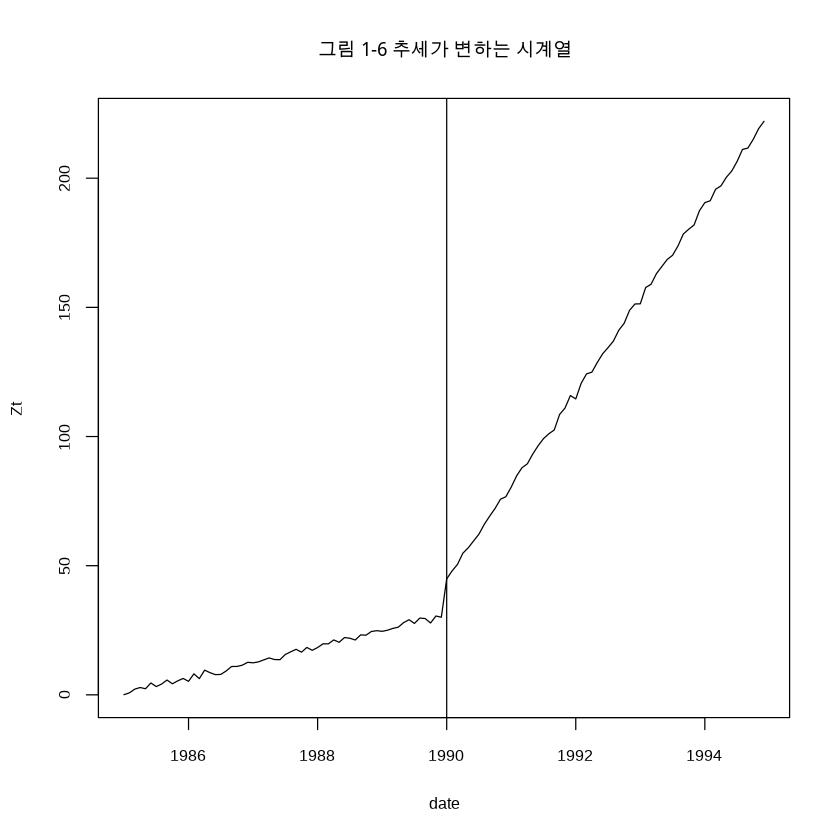

In [13]:
## Figure 1.6: 추세선이 두 개인 시계열자료
set.seed(4321)
n = 120; t <- 1:n
a <- rnorm(n)
x <- 3 * (t - 46)
x[t <= 60] = 0.5 * t[t<=60]
z <- x + a # 추세성분 x + 무작위 변동성 a
z.ts <- ts(z, frequency = 12, start = c(1985, 1))
ts.plot(z.ts, xlab = "date", ylab = "Zt", main = "그림 1-6 추세가 변하는 시계열"); abline(v=1990)